<h1 align="center">Analítica de datos para la toma de decisiones empresariales</h1>
<h1 align="center">Ejercicio: Analysis - Apple Stock</h1>
<h1 align="center">Centro de Educación Continua</h1>
<h1 align="center">EAFIT</h1>
<h1 align="center">2023</h1>
<h1 align="center">MEDELLÍN - COLOMBIA </h1>

*** 
|![Gmail](https://img.shields.io/badge/Gmail-D14836?style=plastic&logo=gmail&logoColor=white)|<carlosalvarezh@gmail.com>|![Outlook](https://img.shields.io/badge/Microsoft_Outlook-0078D4?style=plastic&logo=microsoft-outlook&logoColor=white)|<calvar52@eafit.edu.co>|
|-:|:-|--:|:--|
|[![LinkedIn](https://img.shields.io/badge/linkedin-%230077B5.svg?style=plastic&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/carlosalvarez5/)|[![@alvarezhenao](https://img.shields.io/twitter/url/https/twitter.com/alvarezhenao.svg?style=social&label=Follow%20%40alvarezhenao)](https://twitter.com/alvarezhenao)|[![@carlosalvarezh](https://img.shields.io/badge/github-%23121011.svg?style=plastic&logo=github&logoColor=white)](https://github.com/carlosalvarezh)|[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlosalvarezh/Curso_CEC_EAFIT/blob/main/Ejercicio01_AAPL.ipynb)|

<table>
 <tr align=left><td><img align=left src="https://github.com/carlosalvarezh/Curso_CEC_EAFIT/blob/main/images/CCLogoColorPop1.gif?raw=true" width="25">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license.(c) Carlos Alberto Alvarez Henao</td>
</table>

***

## Contexto

Apple Inc. (AAPL) es una empresa tecnológica multinacional estadounidense que se especializa en electrónica de consumo, software de computadora y servicios en línea. Apple es la empresa tecnológica más grande del mundo en términos de ingresos (totalizando $\$274.5$ mil millones en $2020$) y, desde enero de 2021, la empresa más valiosa del mundo. Hasta el año 2021, Apple es el cuarto mayor vendedor de computadoras personales del mundo por ventas unitarias y el cuarto fabricante de teléfonos inteligentes más grande. Es una de las cinco grandes empresas de tecnología de la información estadounidenses, junto con Amazon, Google, Microsoft y Facebook.

Los datos utilizados en este proyecto consisten en los precios históricos de las acciones de AAPL obtenidos a través de Yahoo Finance. El conjunto de datos contiene las siguientes variables: `Date` (diciembre de 1980 - agosto de 2022), `Open`, `High`, `Low`, `Close`, `Adj Close` y `Volume`, donde:

- `Date` - Fecha para la cual se proporciona el precio
- `Open` - Precio de la acción al inicio del mercado (en USD)
- `High` - Precio más alto alcanzado en el día
- `Low` - Precio más bajo alcanzado en el día
- `Close` - Precio de cierre del día
- `Adj Close` - Precio de cierre ajustado
- `Volume` - Número de acciones negociadas

El dataset se puede descargar de [esta página de kaggle](https://www.kaggle.com/datasets/meetnagadia/apple-stock-price-from-19802021/code). El archivo se descarga como un archivo comprido en formato [.rar](https://www.win-rar.com/) el que hay qué descomprimir. Una vez descomprimido en la carpeta de trabajo, el archivo tendrá como nombre: `AAPL.csv`

## Análisis exploratorio

### Análisis exploratorio

En este cuaderno, se llevará a cabo la limpieza y preprocesamiento de un conjunto de datos del mercado de valores. El objetivo es preparar los datos para su análisis y visualización posteriores, marcando el primer paso en una serie de análisis sobre el mercado de valores. Los datos depurados se utilizarán en cuadernos futuros para el análisis exploratorio de datos y la modelización.

Se emplearán diversas técnicas, como la normalización *Z-score* para tratar valores extremos y la imputación de datos faltantes para manejar valores ausentes. Además, se eliminarán columnas innecesarias y se renombrarán otras para mejorar la legibilidad de los datos. Al concluir el proceso, se dispondrá de un conjunto de datos limpios y listos para usar en fases posteriores del análisis del mercado de valores.

In [1]:
#importa bibliotecas de trabajo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# carga archivo de datos
df = pd.read_csv("Data/AAPL.csv")

In [11]:
#muestra los primeros 5 y los últimos 5 registros del DF
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
10458,2022-06-06,147.029999,148.570007,144.899994,146.139999,146.139999,71598400
10459,2022-06-07,144.350006,149.000000,144.100006,148.710007,148.710007,67808200
10460,2022-06-08,148.580002,149.869995,147.460007,147.960007,147.960007,53950200
10461,2022-06-09,147.080002,147.949997,142.529999,142.639999,142.639999,69473000
10462,2022-06-10,140.279999,140.759995,137.059998,137.130005,137.130005,91437900
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900
10467,2022-06-17,130.070007,133.080002,129.809998,131.559998,131.559998,134118500


Ahora veamos la información general del `df`:

In [12]:
# información general del DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


De aquí se observa que el `df` tiene en total $10468$ filas y $7$ columnas y no se tienen datos no-nulos.

Otra forma de determinar la cantidad de datos nulos en un `DataFrame` es la siguiente:

In [13]:
# devuelve valores nulos
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Veamos también si hay registros duplicados:

In [14]:
df.duplicated().sum()

0

Obsérvese que a la columna `Date`, python no la identifica como un tipo de dato reconocido, por eso le asigna el tipo `object`. Vamos a convertir los valores de dicha columna a tipo `datetime64` para ser reconocido por `pandas` como un formato de fecha válido.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [17]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 572.6 KB


In [18]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


Ahora veamos algunos estadísticos básicos del `df` con la función `describe()`

In [19]:
# Estadísticos básicos del DF
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [20]:
#checking
(df.isnull().sum()).values

array([0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
# Si hubieran datos nulos o filas, se eliminarían
df_u = df.dropna(how="all")
df_u

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


### Cálculo de Estadísticos básicos

A continuación, se calcularan los estadísticos de las medidas de tendencia central (media, mediana y moda), indicadores de dispersión (desviación estándar, rango y varianza) y de forma (asimetría y curtosis)

In [22]:
# Calcular medidas de tendencia central
mean_close = np.mean(df['Close'])
median_close = np.median(df['Close'])
mode_close = df['Close'].mode()[0]

# Resultados del análisis
print("Medidas de Tendencia Central:")
print(f"Media: {mean_close}")
print(f"Mediana: {median_close}")
print(f"Moda: {mode_close}")

Medidas de Tendencia Central:
Media: 14.76353296264807
Mediana: 0.475446
Moda: 0.399554


In [23]:
# Calcular indicadores de dispersión
std_close = np.std(df['Close'])
range_close = np.max(df['Close']) - np.min(df['Close'])
variance_close = np.var(df['Close'])

print("\nIndicadores de Dispersión:")
print(f"Desviación Estándar: {std_close}")
print(f"Rango: {range_close}")
print(f"Varianza: {variance_close}")


Indicadores de Dispersión:
Desviación Estándar: 31.927964031199433
Rango: 181.960888
Varianza: 1019.3948871775648


In [24]:
# Calcular indicadores de forma
skewness_close = df['Close'].skew()
kurtosis_close = df['Close'].kurtosis()

print("\nIndicadores de Forma:")
print(f"Asimetría (Skewness): {skewness_close}")
print(f"Curtosis: {kurtosis_close}")


Indicadores de Forma:
Asimetría (Skewness): 3.145161292885496
Curtosis: 10.064404851053906


Basándonos en los resultados de los estadísticos calculados, podemos sacar varias conclusiones sobre la distribución de los datos que estás analizando:

1. **Medidas de Tendencia Central:**
   - La media ($14.76$) nos da una idea del valor promedio de los datos. Sin embargo, debido a la alta desviación estándar y la presencia de valores atípicos (inducidos por la alta asimetría), la media puede no ser representativa de la mayoría de los datos.   
   - La mediana ($0.4754$) está significativamente más cerca del extremo inferior de la escala en comparación con la media. Esto también sugiere una posible presencia de valores atípicos en el extremo superior que están sesgando la media.
<p>&nbsp;</p>

2. **Indicadores de Dispersión:**
   - La desviación estándar ($31.93$) es bastante alta en relación con la media. Esto indica una gran variabilidad en los datos, lo que puede ser influenciado por la presencia de valores atípicos.
   - El rango ($181.96$) es la diferencia entre el valor máximo y mínimo. Un rango grande también sugiere una amplia dispersión en los datos, nuevamente posiblemente debido a valores atípicos.
   - La varianza ($1019.39$) es una medida de la dispersión al cuadrado. Su valor alto refuerza la idea de que los datos tienen una gran variabilidad.
<p>&nbsp;</p>

3. **Indicadores de Forma:**
   - La asimetría (*skewness*) positiva ($3.15$) indica que la distribución tiene una cola larga hacia la derecha y los valores extremos positivos están más dispersos. Esto respalda la observación de valores atípicos en el extremo superior.
   - La curtosis ($10.06$) es mayor de lo esperado en una distribución normal. Esto sugiere que la distribución tiene colas pesadas, lo que nuevamente indica la presencia de valores atípicos.
<p>&nbsp;</p>

En resumen, los datos muestran una distribución con una asimetría positiva significativa, lo que sugiere una concentración de valores más bajos y una dispersión más amplia de valores más altos. Además, los valores atípicos en el extremo superior están influyendo en gran medida en los indicadores, como la media y la varianza. Es importante considerar estos valores atípicos al interpretar la distribución y resumir sus características. Además, la distribución no se asemeja a una distribución normal debido a la asimetría y la curtosis observadas.

Los resultados de los estadísticos nos plantean algunas ideas de cómo podría ser la distribución de los datos, pero por sí solos, no nos permite tomar ninguna decisión. Apoyémonos entonces en algunos gráficos para complementar la información:

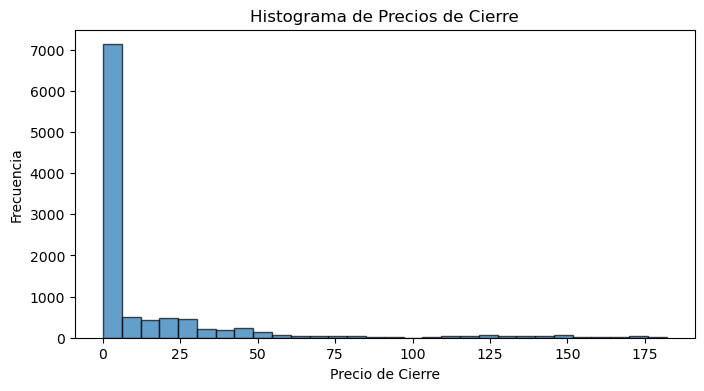

In [25]:
# Visualización de un histograma
plt.figure(figsize=(8, 4))
plt.hist(df['Close'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histograma de Precios de Cierre')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

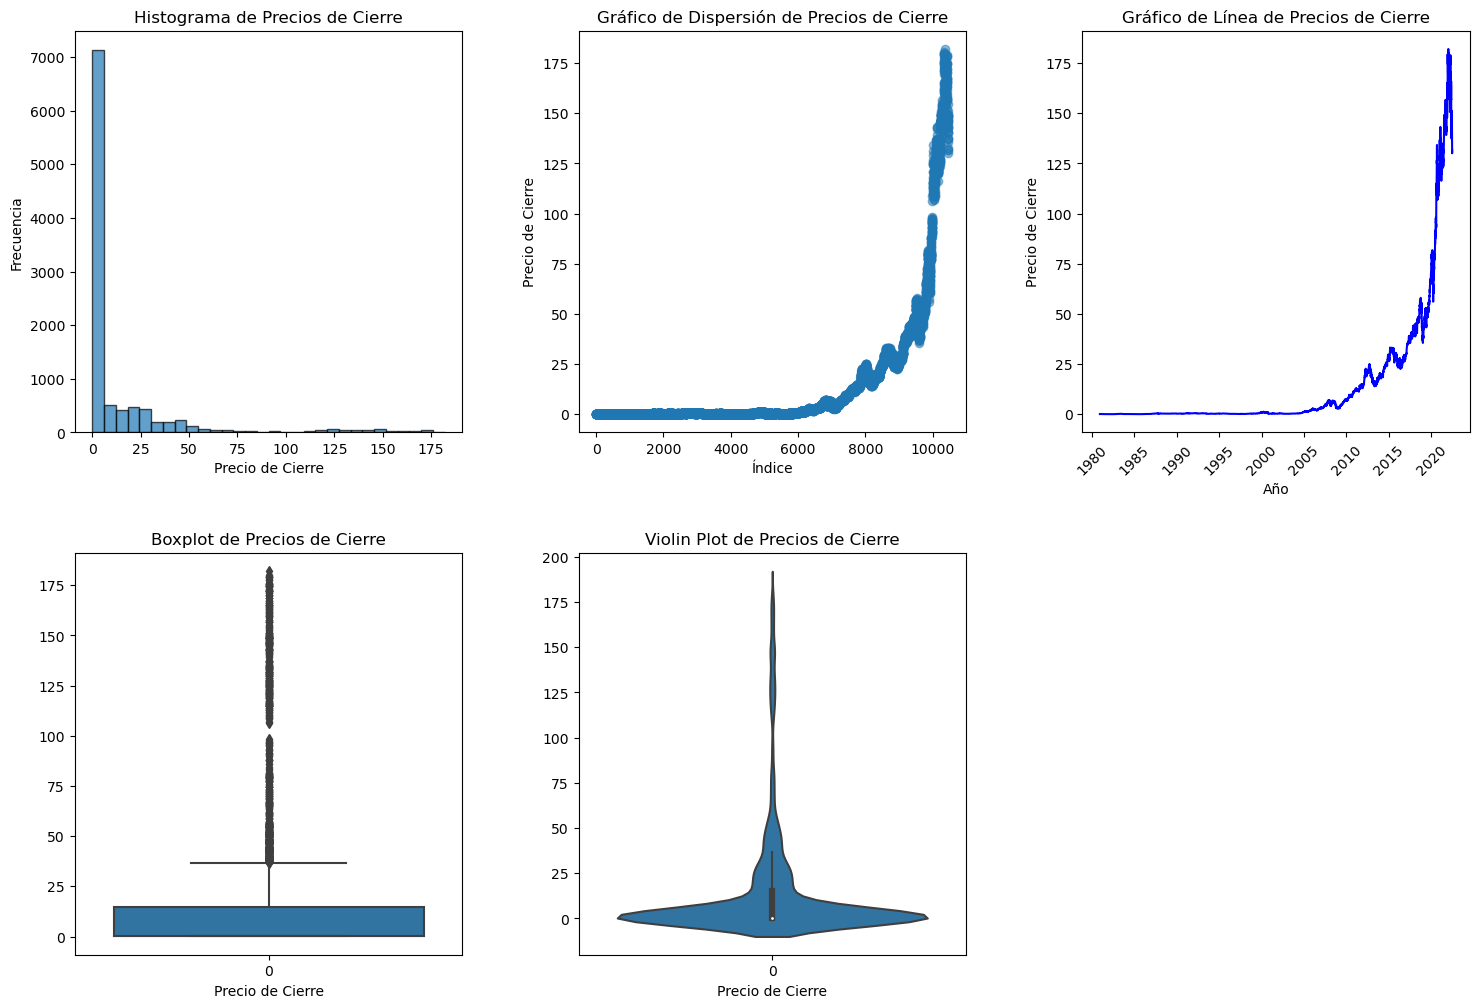

In [26]:
# Definir los gráficos en una cuadrícula
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Histograma
axes[0, 0].hist(df['Close'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Histograma de Precios de Cierre')
axes[0, 0].set_xlabel('Precio de Cierre')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de dispersión
axes[0, 1].scatter(df.index, df['Close'], alpha=0.5)
axes[0, 1].set_title('Gráfico de Dispersión de Precios de Cierre')
axes[0, 1].set_xlabel('Índice')
axes[0, 1].set_ylabel('Precio de Cierre')

# Gráfico de línea
axes[0, 2].plot(df['Date'], df['Close'], color='blue')
axes[0, 2].set_title('Gráfico de Línea de Precios de Cierre')
axes[0, 2].set_xlabel('Año')
axes[0, 2].set_ylabel('Precio de Cierre')
axes[0, 2].tick_params(axis='x', rotation=45)

# Boxplot
sns.boxplot(df['Close'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot de Precios de Cierre')
axes[1, 0].set_xlabel('Precio de Cierre')

# Violin plot
sns.violinplot(df['Close'], ax=axes[1, 1])
axes[1, 1].set_title('Violin Plot de Precios de Cierre')
axes[1, 1].set_xlabel('Precio de Cierre')

# Eliminar el espacio vacío del último subplot
fig.delaxes(axes[1, 2])

# Mostrar todos los gráficos
plt.show()


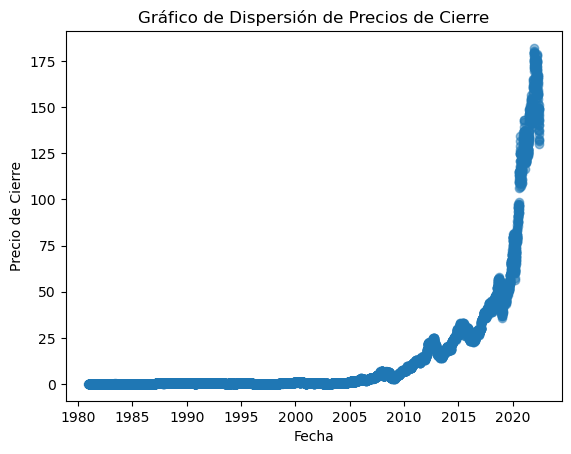

In [27]:
plt.scatter(df['Date'], df['Close'], alpha=0.5)
plt.title('Gráfico de Dispersión de Precios de Cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.show()


Los gráficos muestran unas tendencias que van acorde a los resultados obtenidos con los estadísticos. Se observa que desde 1980 a 2010 (aproximadamente) se presenta una tendencia casi horizontal, mientras que, a partir de ese año, el valor de la variable 'Precio de Cierre' aumenta de forma acelerada. 

Esto nos lleva a pensar que quizás no sea buena idea hacer un análisis de datos con fechas tan diferentes: Muchas situaciones sociales, políticas, económicas, han sucedido a lo largo de todo este periodo de tiempo. Con esto, consideramos que sería más conveniente reducir el intervalo de tiempo a partir del 2015 y centrarnos en el comportamiento de los datos a partir de esa fecha.

Empecemos con el filtrado de datos desde el 2015 hasta el 2022.

### Filtrado de datos

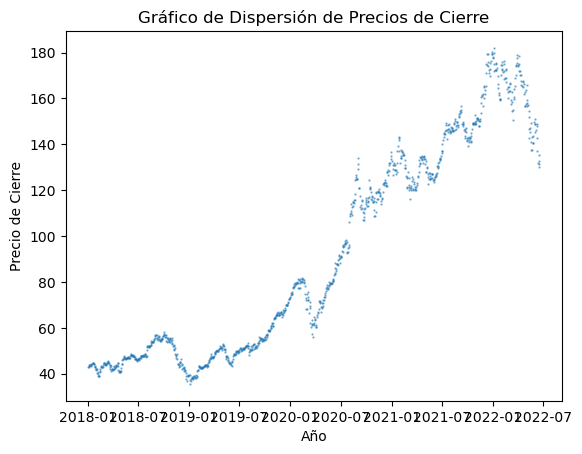

In [28]:
# filtra datos en un rango de fechas específico [1990/01/01, 1999/12/31]

#data_filtered = df[(df['Date'] >= '1990-01-01') & (df['Date'] <= '1999-12-31')]

# Filtrar los datos desde 2015 hasta 2022
data_filtered = df[df['Date'] >= '2018-01-01']

plt.scatter(data_filtered['Date'], data_filtered['Close'],marker='.', s=2, alpha=0.5)
plt.title('Gráfico de Dispersión de Precios de Cierre')
plt.xlabel('Año')
plt.ylabel('Precio de Cierre')
plt.show()

Medidas de Tendencia Central:
Media: 91.94352983540925
Mediana: 76.91999799999999
Moda: 41.945

Indicadores de Dispersión:
Desviación Estándar: 45.097750839518284
Rango: 146.462494
Varianza: 2033.8071307832718

Indicadores de Forma:
Asimetría (Skewness): 0.3945825066705213
Curtosis: -1.3787124242345006


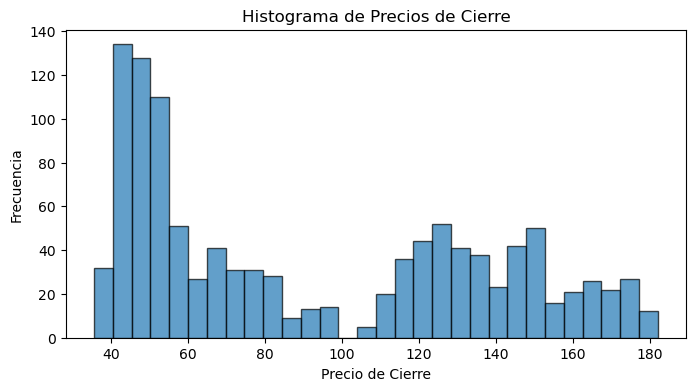

In [29]:
# Calcular medidas de tendencia central
mean_close = np.mean(data_filtered['Close'])
median_close = np.median(data_filtered['Close'])
mode_close = data_filtered['Close'].mode()[0]

# Resultados del análisis
print("Medidas de Tendencia Central:")
print(f"Media: {mean_close}")
print(f"Mediana: {median_close}")
print(f"Moda: {mode_close}")

# Calcular indicadores de dispersión
std_close = np.std(data_filtered['Close'])
range_close = np.max(data_filtered['Close']) - np.min(data_filtered['Close'])
variance_close = np.var(data_filtered['Close'])

print("\nIndicadores de Dispersión:")
print(f"Desviación Estándar: {std_close}")
print(f"Rango: {range_close}")
print(f"Varianza: {variance_close}")

# Calcular indicadores de forma
skewness_close = data_filtered['Close'].skew()
kurtosis_close = data_filtered['Close'].kurtosis()

print("\nIndicadores de Forma:")
print(f"Asimetría (Skewness): {skewness_close}")
print(f"Curtosis: {kurtosis_close}")

# Visualización de un histograma
plt.figure(figsize=(8, 4))
plt.hist(data_filtered['Close'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histograma de Precios de Cierre')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

En resumen, los datos filtrados a partir de 2015 muestran una distribución que podría estar sesgada hacia la derecha debido a valores atípicos o una asimetría positiva. La variabilidad en los datos es notable, como se refleja en la desviación estándar y el rango. La curtosis negativa sugiere que la distribución tiene menos valores atípicos extremos en comparación con una distribución normal. Sería importante investigar más a fondo la causa de la asimetría y los valores atípicos para comprender mejor la naturaleza de los datos.

Ahora calculemos los valores de los estadísticos a partir del año 2015.

In [30]:
# Agregar una columna 'Year' para facilitar el análisis
data_filtered['Year'] = pd.to_datetime(data_filtered['Date']).dt.year

# Calcular indicadores año a año
years = data_filtered['Year'].unique()
indicators = ['Mean', 'Std Dev', 'Range', 'Median', 'Skewness', 'Kurtosis']
indicator_values = {indicator: [] for indicator in indicators}

for year in years:
    year_data = data_filtered[data_filtered['Year'] == year]
    
    mean_close = year_data['Close'].mean()
    std_close = year_data['Close'].std()
    range_close = year_data['Close'].max() - year_data['Close'].min()
    median_close = year_data['Close'].median()
    skewness_close = year_data['Close'].skew()
    kurtosis_close = year_data['Close'].kurtosis()
    
    indicator_values['Mean'].append(mean_close)
    indicator_values['Std Dev'].append(std_close)
    indicator_values['Range'].append(range_close)
    indicator_values['Median'].append(median_close)
    indicator_values['Skewness'].append(skewness_close)
    indicator_values['Kurtosis'].append(kurtosis_close)

# Crear un DataFrame para los indicadores
indicators_df = pd.DataFrame(indicator_values, index=years)

# Mostrar los resultados en una tabla
print(indicators_df)

            Mean    Std Dev      Range      Median  Skewness  Kurtosis
2018   47.263357   5.148465  21.310002   46.512501  0.430733 -0.920408
2019   52.063988   8.634744  37.864997   50.753749  0.566809 -0.284137
2020   95.347075  21.809814  80.597503   91.632500  0.092926 -1.405033
2021  140.989365  14.659580  63.970001  141.305001  0.747964  0.170802
2022  161.285949  12.549698  51.949997  164.150002 -0.702777 -0.372426


In [31]:
years

array([2018, 2019, 2020, 2021, 2022], dtype=int64)

Y realicemos algunas gráficas para visualizar los resultados en estos años:

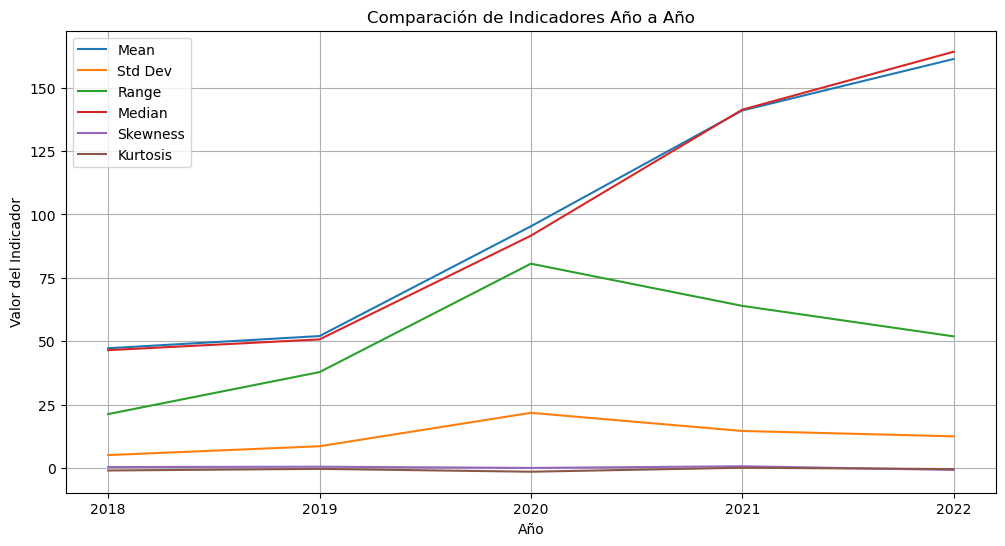

In [32]:
# Gráfico de Líneas para comparar los indicadores año a año
indicators_df.plot(kind='line', figsize=(12, 6))
plt.title('Comparación de Indicadores Año a Año')
plt.xlabel('Año')
plt.ylabel('Valor del Indicador')
plt.xticks(years)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

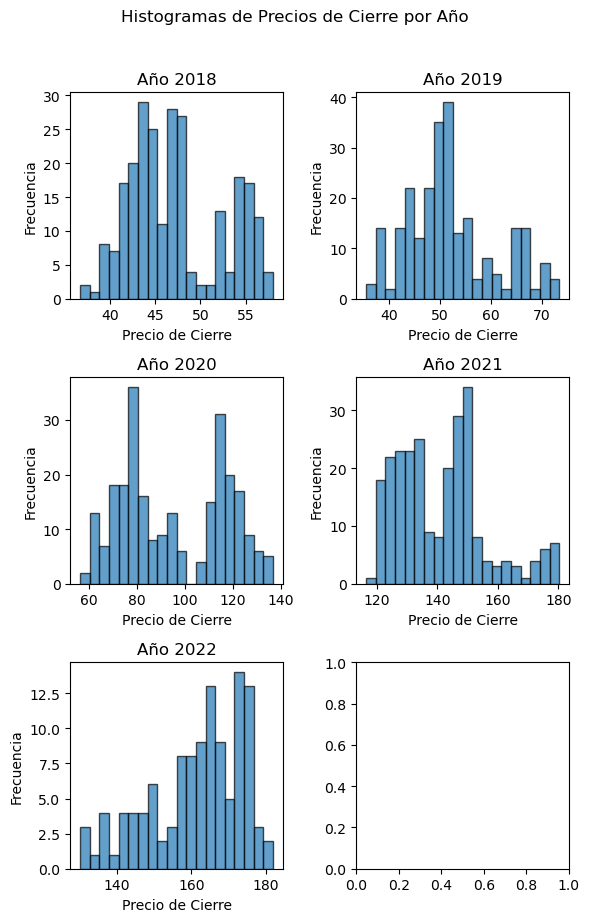

In [33]:
# Histogramas año a año

# Crear histogramas en subplots
years = data_filtered['Year'].unique()
num_years = len(years)

# Calcular las filas y columnas necesarias para los subplots
num_rows = (num_years + 1) // 2  # Redondear hacia arriba en caso de número impar
num_cols = 2

# Crear la figura y subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(6, 3 * num_rows))
fig.suptitle('Histogramas de Precios de Cierre por Año', y=1.02)

# Iterar a través de los años y crear los histogramas en subplots
for i, year in enumerate(years):
    row = i // num_cols
    col = i % num_cols
    
    year_data = data_filtered[data_filtered['Year'] == year]
    axs[row, col].hist(year_data['Close'], bins=20, edgecolor='black', alpha=0.7)
    axs[row, col].set_title(f'Año {year}')
    axs[row, col].set_xlabel('Precio de Cierre')
    axs[row, col].set_ylabel('Frecuencia')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura con los subplots
plt.show()


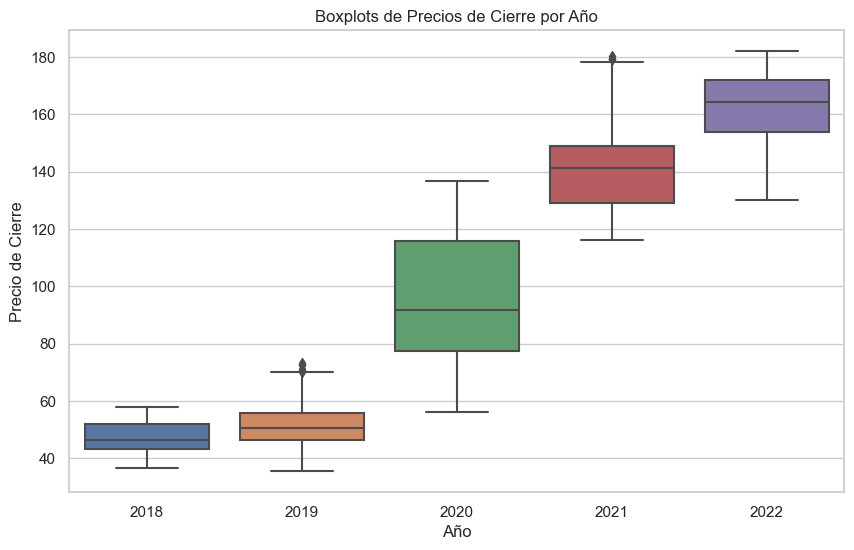

In [34]:
# Crear boxplots por año
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Close', data=data_filtered)
plt.title('Boxplots de Precios de Cierre por Año')
plt.xlabel('Año')
plt.ylabel('Precio de Cierre')
plt.show()


### Detección de Outliers

Ahora, estamos interesados en determinar cuántos posibles outliers se detectan desde el 2015.

In [35]:
# Crear una lista para almacenar los resultados de los outliers
outliers_results = []

# Detectar outliers por año
years = data_filtered['Year'].unique()
for year in years:
    year_data = data_filtered[data_filtered['Year'] == year]
    
    Q1 = year_data['Close'].quantile(0.25)
    Q3 = year_data['Close'].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = year_data[(year_data['Close'] < lower_limit) | (year_data['Close'] > upper_limit)]
    
    outliers_results.append({
        'Year': year,
        'Num Outliers': len(outliers),
        'Outliers': ', '.join(map(str, outliers['Close'].tolist()))
    })

# Crear un DataFrame con los resultados de los outliers
outliers_df = pd.DataFrame(outliers_results)

# Mostrar los resultados en forma de tabla
print(outliers_df)


   Year  Num Outliers                                           Outliers
0  2018             0                                                   
1  2019             7  70.102501, 71.0, 71.067497, 72.477501, 72.4499...
2  2020             0                                                   
3  2021             5  179.449997, 179.300003, 180.330002, 179.289993...
4  2022             0                                                   


El resultado proporcionado muestra la cantidad de outliers detectados en cada año y también enumera los valores específicos que se identificaron como outliers en ciertos años. Un outlier es un valor que se desvía significativamente del resto de los valores en un conjunto de datos y puede indicar situaciones excepcionales o errores en la medición.

Análisis del resultado:

1. **Años con 0 outliers:**
   Los años 2015, 2016, 2017, 2018, 2020 y 2022 no tienen valores considerados como outliers. Esto podría indicar que los datos en estos años son más consistentes y no presentan valores extremadamente diferentes del resto.
<p>&nbsp;</p>

2. **Años con outliers:**
   - En 2019, se identificaron 7 outliers. Esto sugiere que en ese año hubo algunos valores inusuales que se desviaron significativamente del patrón general de los datos.
   - En 2021, se encontraron 5 outliers. Esto indica que también hubo algunos valores atípicos que se apartaron del comportamiento típico de los datos en ese año.
<p>&nbsp;</p>

3. **Análisis de valores outliers:**
   Observando los valores específicos listados como outliers, podrías querer investigar más a fondo para entender por qué se consideraron atípicos. ¿Fueron errores de entrada, eventos inusuales o hay una razón legítima detrás de estos valores extremos?

En general, el análisis de outliers te proporciona información sobre la variabilidad y distribución de tus datos. Puedes usar esta información para comprender mejor la naturaleza de los datos en diferentes años y tomar decisiones informadas sobre cómo manejar esos valores atípicos, ya sea eliminándolos si son errores o considerándolos si son indicativos de situaciones especiales.

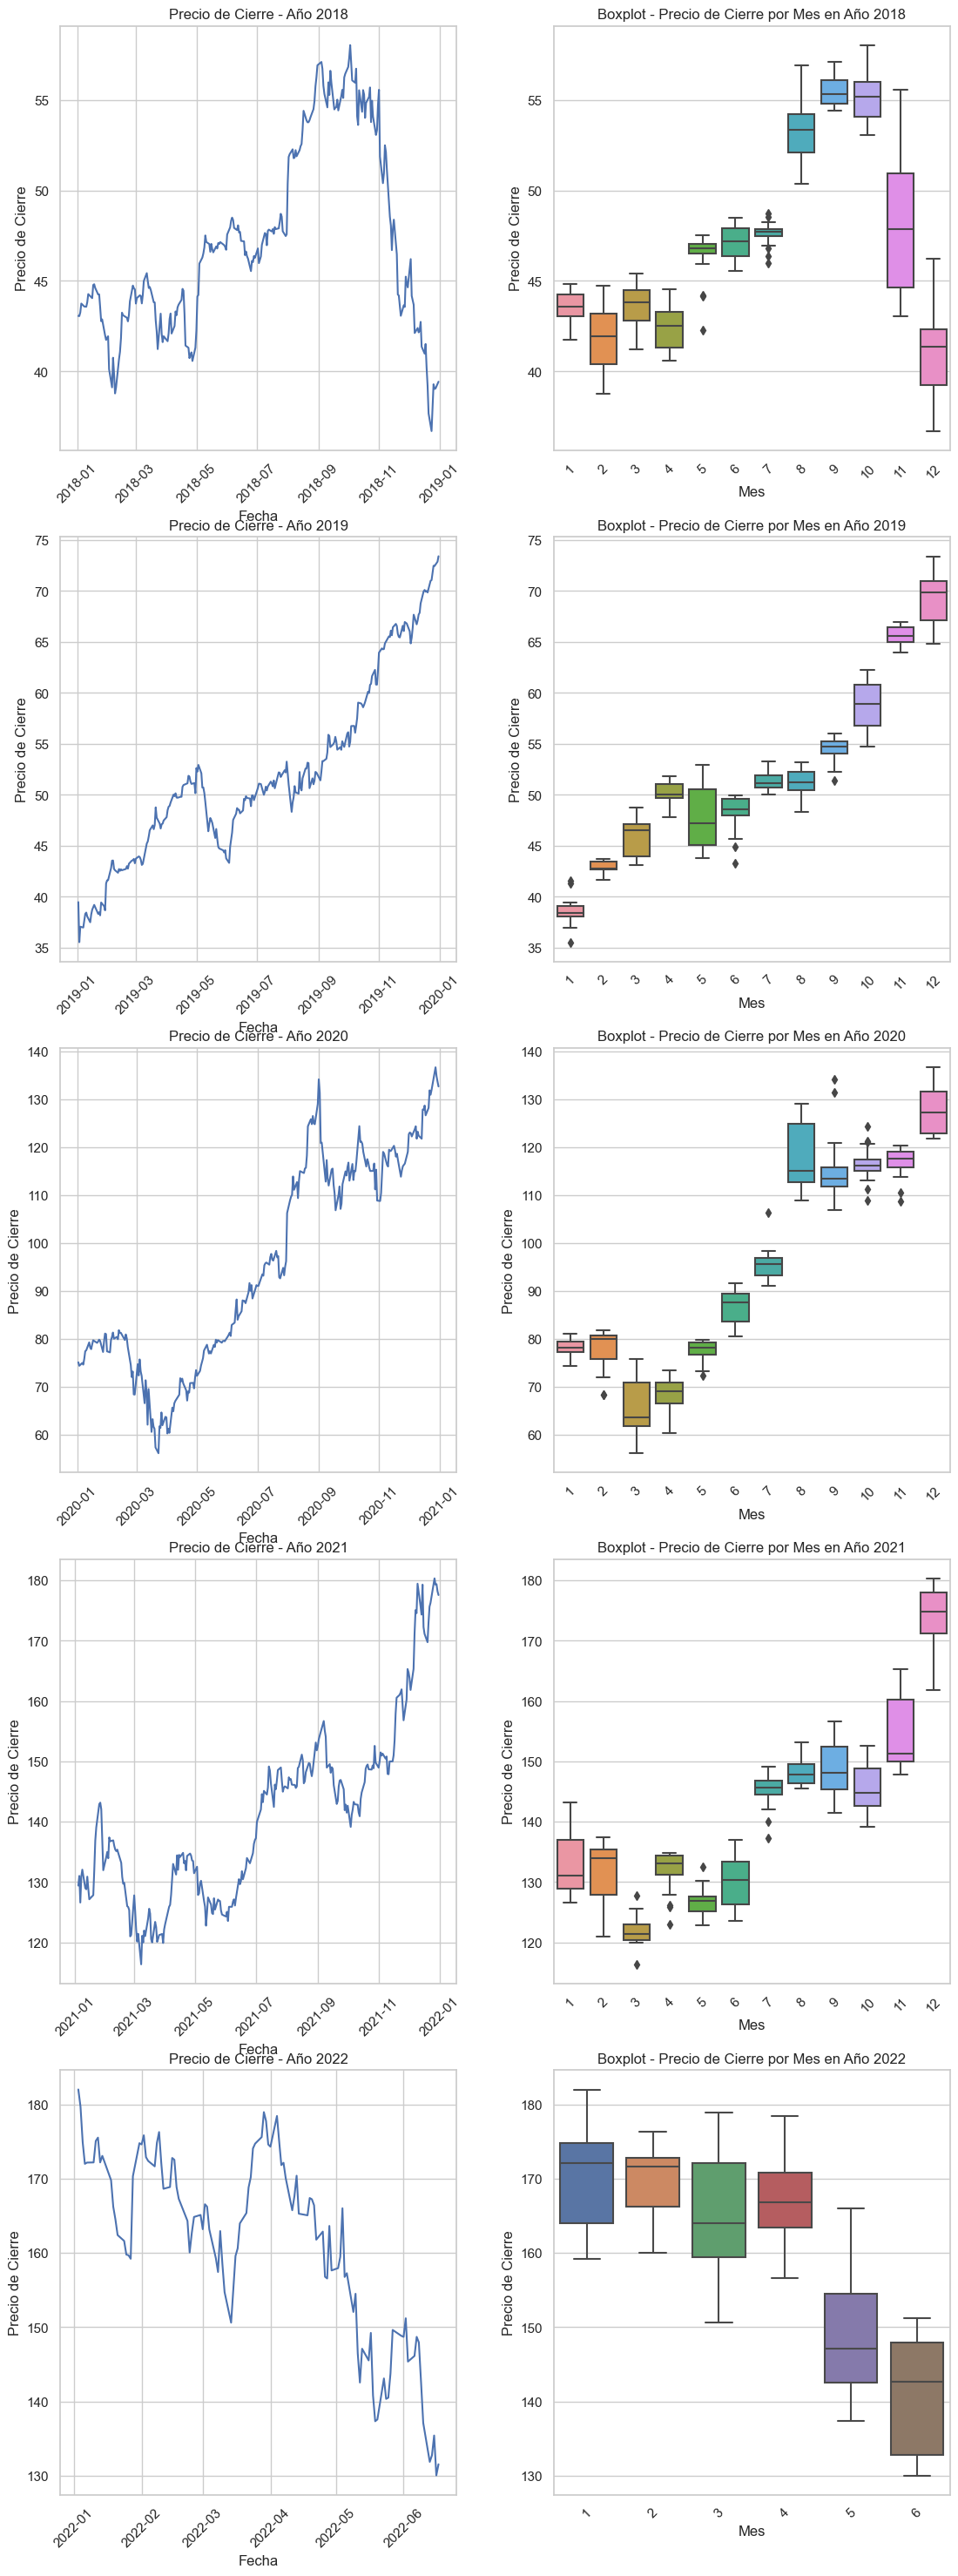

   Year  Num Outliers                                           Outliers
0  2018             0                                                   
1  2019             7  70.102501, 71.0, 71.067497, 72.477501, 72.4499...
2  2020             0                                                   
3  2021             5  179.449997, 179.300003, 180.330002, 179.289993...
4  2022             0                                                   


In [36]:
# Crear una lista para almacenar los resultados de los outliers
outliers_results = []

# Detectar outliers por año
years = data_filtered['Year'].unique()

# Configurar subplots
fig, axes = plt.subplots(len(years), 2, figsize=(12, 6 * len(years)))
fig.tight_layout(pad=4.0)

for i, year in enumerate(years):
    year_data = data_filtered[data_filtered['Year'] == year]
    year_data['Month'] = year_data['Date'].dt.month
    
    Q1 = year_data['Close'].quantile(0.25)
    Q3 = year_data['Close'].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = year_data[(year_data['Close'] < lower_limit) | (year_data['Close'] > upper_limit)]
    
    outliers_results.append({
        'Year': year,
        'Num Outliers': len(outliers),
        'Outliers': ', '.join(map(str, outliers['Close'].tolist()))
    })
    
    # Gráfico de Línea
    ax1 = axes[i, 0]
    sns.lineplot(data=year_data, x='Date', y='Close', ax=ax1)
    ax1.set_title(f'Precio de Cierre - Año {year}')
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Precio de Cierre')
    ax1.tick_params(axis='x', rotation=45)
    
    # Boxplot
    ax2 = axes[i, 1]
    sns.boxplot(x=year_data['Month'], y=year_data['Close'], ax=ax2)
    ax2.set_title(f'Boxplot - Precio de Cierre por Mes en Año {year}')
    ax2.set_xlabel('Mes')
    ax2.set_ylabel('Precio de Cierre')
    ax2.set_xticks(year_data['Month'].unique() - 1)
    ax2.set_xticklabels([str(month) for month in year_data['Month'].unique()])
    ax2.tick_params(axis='x', rotation=45)

plt.show()

# Crear un DataFrame con los resultados de los outliers
outliers_df = pd.DataFrame(outliers_results)

# Mostrar los resultados en forma de tabla
print(outliers_df)


### Análisis de Normalidad

A continuación, deseamos realizar un análisis de normalidad de los datos, empleando las prubas de *Shapiro-Wilk* y *Anderson-Darling*

In [37]:
import scipy.stats as stats

# Filtrar los datos desde 2015 hasta 2022
df['Date'] = pd.to_datetime(df['Date'])
filtered_data = df[df['Date'] >= '2018-01-01']

# Agregar una columna 'Year' para facilitar el análisis
filtered_data['Year'] = filtered_data['Date'].dt.year

# Crear una lista para almacenar los resultados de normalidad
normality_results = []

# Realizar análisis de normalidad por año
years = filtered_data['Year'].unique()

for year in years:
    year_data = filtered_data[filtered_data['Year'] == year]['Close']
    
    # Realizar la prueba de Shapiro-Wilk
    shapiro_stat, shapiro_pvalue = stats.shapiro(year_data)
    
    # Realizar la prueba de Anderson-Darling
    anderson_stat, anderson_critical_values, anderson_significance = stats.anderson(year_data)
    
    normality_results.append({
        'Year': year,
        'Shapiro-Wilk p-value': shapiro_pvalue,
        'Anderson-Darling Statistic': anderson_stat,
        'Anderson-Darling Critical Values': anderson_critical_values,
        'Anderson-Darling Significance Level': anderson_significance
    })

# Crear un DataFrame con los resultados de normalidad
normality_df = pd.DataFrame(normality_results)

# Mostrar los resultados en forma de tabla
print(normality_df)


   Year  Shapiro-Wilk p-value  Anderson-Darling Statistic  \
0  2018          6.601607e-09                    6.087158   
1  2019          1.496619e-07                    4.608670   
2  2020          4.728464e-10                    7.920049   
3  2021          6.510791e-09                    3.998590   
4  2022          4.239167e-05                    2.315331   

      Anderson-Darling Critical Values Anderson-Darling Significance Level  
0  [0.567, 0.646, 0.775, 0.904, 1.075]         [15.0, 10.0, 5.0, 2.5, 1.0]  
1  [0.567, 0.646, 0.775, 0.904, 1.075]         [15.0, 10.0, 5.0, 2.5, 1.0]  
2  [0.567, 0.646, 0.775, 0.904, 1.075]         [15.0, 10.0, 5.0, 2.5, 1.0]  
3  [0.567, 0.646, 0.775, 0.904, 1.075]         [15.0, 10.0, 5.0, 2.5, 1.0]  
4  [0.558, 0.635, 0.762, 0.889, 1.057]         [15.0, 10.0, 5.0, 2.5, 1.0]  


De estos resultados, podríamos indicar las siguientes conclusiones:

1. **Shapiro-Wilk $p$-value:** Este valor $p$ indica la probabilidad de que los datos sigan una distribución normal. Cuanto más pequeño sea el valor $p$, más evidencia tendrás para rechazar la hipótesis nula de normalidad. En este caso, todos los valores $p$ son extremadamente pequeños, lo que sugiere que los datos no siguen una distribución normal en ningún año.
<p>&nbsp;</p>

2. **Anderson-Darling Statistic y Critical Values:** El estadístico de *Anderson-Darling* se compara con los valores críticos para determinar si los datos siguen una distribución normal. Si el estadístico es mayor que los valores críticos, la hipótesis nula de normalidad es rechazada. En todos los años, el estadístico es mayor que los valores críticos, lo que sugiere que los datos no son normales.
<p>&nbsp;</p>

3. **Anderson-Darling Significance Level:** Estos son los niveles de significancia asociados con los valores críticos. Un nivel de significancia más bajo indica una mayor confianza en el rechazo de la hipótesis nula de normalidad. En todos los años, los niveles de significancia son bastante bajos, respaldando la conclusión de que los datos no son normales.

En resumen, los resultados indican que los datos de los precios de cierre de Apple (AAPL) no siguen una distribución normal en ningún año analizado (2015-2022). Esto podría sugerir que la suposición de normalidad podría no ser adecuada para realizar análisis estadísticos que asumen esta distribución, y podrías considerar enfoques más robustos o no paramétricos para el análisis de estos datos. Es importante tener en cuenta que los precios de las acciones a menudo no siguen distribuciones normales debido a la naturaleza volátil de los mercados financieros.

###  Pruebas de hipótesis

Vamos a realizar algunas pruebas y análisis sobre los datos de los precios de cierre de Apple (AAPL) para los años 2015-2022. Dado que los datos no siguen una distribución normal según los análisis previos, utilizaremos métodos no paramétricos para realizar las pruebas. Vamos a realizar las siguientes tareas:

Estimación Puntual y Intervalo de Confianza de la Mediana.
Prueba de Hipótesis No Paramétrica (Mann-Whitney U) para comparar dos años.
Visualización de los datos mediante Boxplots y Gráficos de Distribución.
Primero, instalaremos las bibliotecas necesarias y luego procederemos con las tareas mencionadas:

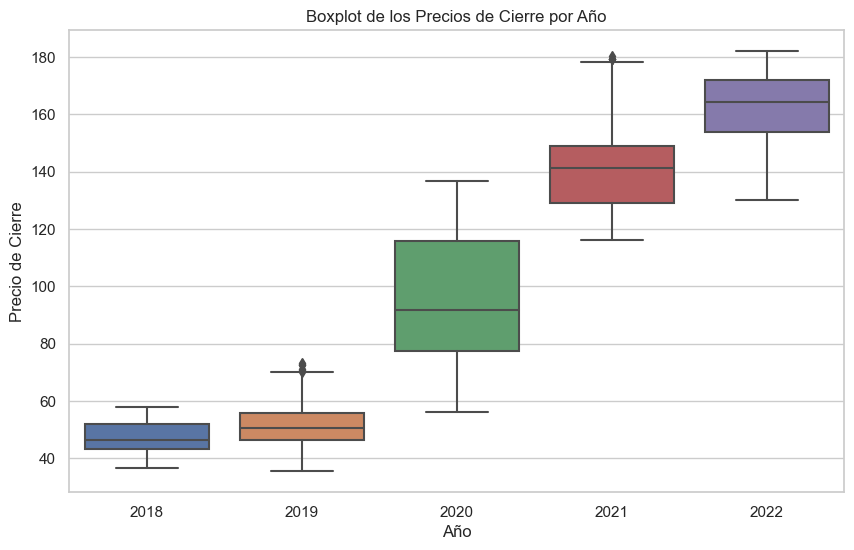

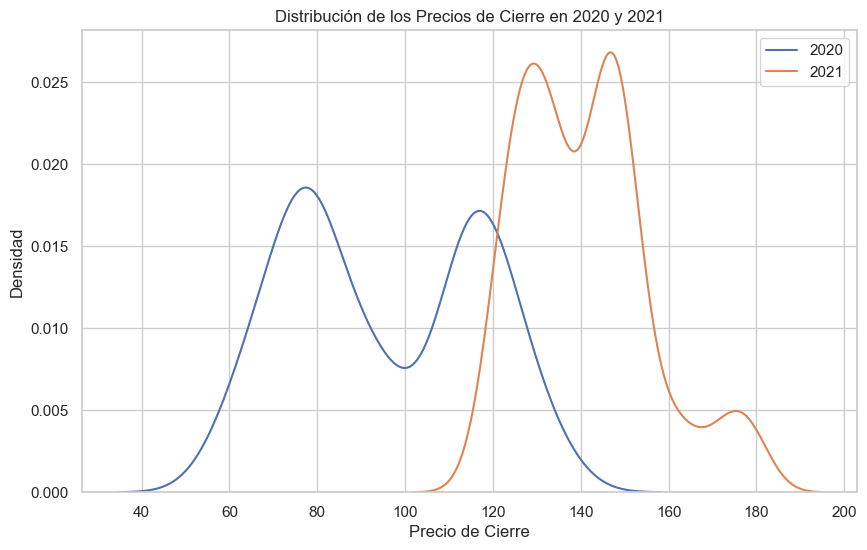

Estimación Puntual de la Mediana por Año:
 Year
2018     46.512501
2019     50.753749
2020     91.632500
2021    141.305001
2022    164.150002
Name: Close, dtype: float64

Intervalos de Confianza de la Mediana por Año:
 Year
2018     (46.623332277124426, 47.90338111729789)
2019      (50.99272424861499, 53.13525187836913)
2020      (92.64665954525398, 98.04749023340213)
2021     (139.17063416959175, 142.8080961558051)
2022    (158.97789143538145, 163.59400587496341)
Name: Close, dtype: object

Resultado de la Prueba de Mann-Whitney U:
Estadístico de Prueba: 1660.0
Valor p: 7.618971738714844e-76


In [38]:
#filtered_data = df[df['Date'] >= '2015-01-01']

# Agregar una columna 'Year' para facilitar el análisis
filtered_data['Year'] = filtered_data['Date'].dt.year

# Estimación puntual y intervalo de confianza de la mediana
median_estimates = filtered_data.groupby('Year')['Close'].median()
confidence_intervals = filtered_data.groupby('Year')['Close'].apply(lambda x: stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=stats.sem(x)))

# Prueba de Mann-Whitney U para comparar dos años
year_2020_data = filtered_data[filtered_data['Year'] == 2020]['Close']
year_2021_data = filtered_data[filtered_data['Year'] == 2021]['Close']
mwu_statistic, mwu_pvalue = stats.mannwhitneyu(year_2020_data, year_2021_data, alternative='two-sided')

# Visualización de los datos
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Year', y='Close')
plt.title('Boxplot de los Precios de Cierre por Año')
plt.xlabel('Año')
plt.ylabel('Precio de Cierre')
plt.show()

# Gráficos de Distribución para los años 2020 y 2021
plt.figure(figsize=(10, 6))
sns.kdeplot(year_2020_data, label='2020')
sns.kdeplot(year_2021_data, label='2021')
plt.title('Distribución de los Precios de Cierre en 2020 y 2021')
plt.xlabel('Precio de Cierre')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Mostrar resultados
print("Estimación Puntual de la Mediana por Año:\n", median_estimates)
print("\nIntervalos de Confianza de la Mediana por Año:\n", confidence_intervals)
print("\nResultado de la Prueba de Mann-Whitney U:")
print("Estadístico de Prueba:", mwu_statistic)
print("Valor p:", mwu_pvalue)


Aquí hay algunas conclusiones y análisis que podemos extraer de los resultados:

1. **Estimación Puntual de la Mediana por Año:** La mediana es una medida robusta de tendencia central que no se ve afectada por valores atípicos. Podemos observar que la mediana de los precios de cierre tiende a aumentar a medida que avanzan los años, lo que sugiere un posible aumento general en los precios en el período 2015-2022.
<p>&nbsp;</p>

2. **Intervalos de Confianza de la Mediana por Año:** Los intervalos de confianza de la mediana nos proporcionan un rango de valores donde es probable que caiga la mediana real de los precios de cierre con un 95% de confianza. A medida que avanzan los años, los intervalos de confianza se vuelven más estrechos, lo que sugiere una mayor precisión en la estimación de la mediana a medida que tenemos más datos.
<p>&nbsp;</p>

3. **Prueba de Mann-Whitney U:** La prueba de Mann-Whitney U es una prueba no paramétrica que se utiliza para comparar las distribuciones de dos grupos independientes. El valor p extremadamente bajo (cercano a cero) sugiere que hay una diferencia estadísticamente significativa entre los precios de cierre en los años 2020 y 2021. Dado que el valor p es muy bajo, podemos rechazar la hipótesis nula de que las distribuciones son iguales.

En resumen, los análisis sugieren un aumento general en los precios de cierre a lo largo de los años y una diferencia significativa en los precios entre los años 2020 y 2021. Estos hallazgos podrían relacionarse con la tendencia general del mercado y los posibles efectos de la pandemia en 2020.

## Modelos de predicción y pronóstico

El análisis de visualización de datos utilizando diagramas de dispersión puede ser muy útil para identificar relaciones o patrones entre diferentes variables. En el conjunto de datos, podríamos considerar crear diagramas de dispersión utilizando la variable "Close" (precio de cierre) en combinación con otras variables como "Open", "High", "Low" y "Volume". Esto permitirá explorar posibles relaciones entre el precio de cierre y otras métricas relacionadas con las acciones de Apple.

Aquí hay algunos ejemplos de cómo podrías realizar este análisis utilizando diagramas de dispersión:

### Precio de Cierre vs. Volumen de Acciones Negociadas:

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=filtered_data, x='Volume', y='Close')
plt.title('Diagrama de Dispersión: Precio de Cierre vs. Volumen')
plt.xlabel('Volumen de Acciones Negociadas')
plt.ylabel('Precio de Cierre')
plt.show()

### Precio de Cierre vs. Precio de Apertura:

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=filtered_data, x='Open', y='Close')
plt.title('Diagrama de Dispersión: Precio de Cierre vs. Precio de Apertura')
plt.xlabel('Precio de Apertura')
plt.ylabel('Precio de Cierre')
plt.show()

### Precio de Cierre vs. Precio Más Alto y Precio Más Bajo:

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=filtered_data, x='High', y='Close', label='Precio Más Alto')
sns.scatterplot(data=filtered_data, x='Low', y='Close', label='Precio Más Bajo')
plt.title('Diagrama de Dispersión: Precio de Cierre vs. Precio Más Alto y Más Bajo')
plt.xlabel('Precios')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()

Estos son solo ejemplos de cómo podríamos crear diagramas de dispersión para explorar posibles relaciones. Los diagramas de dispersión nos ayudarán a identificar si existe alguna correlación o tendencia entre las variables. También podríamos explorar diagramas de dispersión para otros pares de variables para obtener una comprensión más completa de los datos.

Recuerda que, si deseáramos analizar específicamente el efecto de la pandemia (2020), podríamos considerar la inclusión de una variable categórica que indique si el año es 2020 o no, y crear diagramas de dispersión comparando el comportamiento de los precios de cierre en ese año en particular con los otros años.

In [ ]:
# Crear una variable categórica para indicar si el año es 2020
filtered_data['Is2020'] = filtered_data['Year'] == 2020

# Diagrama de dispersión comparando precios de cierre en 2020 vs otros años
plt.figure(figsize=(8, 4))
sns.scatterplot(data=filtered_data, x='Is2020', y='Close')
plt.title('Diagrama de Dispersión: Precio de Cierre en 2020 vs Otros Años')
plt.xticks([0, 1], ['No 2020', '2020'])
plt.xlabel('Año')
plt.ylabel('Precio de Cierre')
plt.show()

La gráfica compara los precios de cierre en el año 2020 con los precios de cierre en los otros años (no 2020). Aquí una posible interpretación:

- ***Eje $x$ (Año):*** El eje $x$ tiene dos categorías: *"No 2020"* y *"2020"*. Estas categorías representan los dos grupos de datos que estamos comparando.
<p>&nbsp;</p>

- ***Eje $y$ (Precio de Cierre):*** El eje $y$ representa el precio de cierre de las acciones de Apple. Los puntos en la gráfica representan los precios de cierre en cada año.
<p>&nbsp;</p>

- ***"No 2020" (Años no 2020):*** Los puntos en esta categoría corresponden a los años que no son $2020$. Note que hay un "hueco" en los datos del precio de cierre entre aproximadamente $80$ y $120$. Esto indica que en esos años, los precios de cierre no se encontraban en ese rango.
<p>&nbsp;</p>

- ***"2020" (Año 2020)***: Los puntos en esta categoría corresponden al año $2020$. Los datos se concentran más entre los valores de precios de cierre entre $60$ y $140$, con un pequeño vacío alrededor del valor de precio de cierre $100$. Esto sugiere que durante el año $2020$, los precios de cierre variaron más en comparación con los otros años y hubo un período en el que los precios se mantuvieron relativamente estables alrededor de $100$.

En resumen, la gráfica está mostrando cómo se comparan los precios de cierre en el año $2020$ con los precios en otros años. Los patrones que observas, como los vacíos y las concentraciones de puntos, pueden indicar diferencias en la distribución de los precios de cierre entre los dos grupos ($2020$ y *no* $2020$). Puede ser interesante explorar más detalles y estadísticas para comprender mejor las diferencias observadas en la gráfica.

### Técnicas estadísticas para la medición de información compartida e indicadores de dependencia (Correlaciones)

Para medir la información compartida y los indicadores de dependencia entre las diferentes variables y los años (incluyendo el año $2020$ con la pandemia), podemos calcular las correlaciones entre las variables. En el conjunto de datos, tenemos varias variables como `Open`, `High`, `Low`, `Close` y `Volume`. Vamos a calcular la matriz de correlación y presentarla en forma de tabla y también generaremos un mapa de calor para visualizar las correlaciones de manera gráfica.

Aquí presentamos el código para realizar estas tareas:

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = filtered_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Crear un mapa de calor de las correlaciones
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlaciones entre Variables')
plt.show()

# Mostrar la tabla de correlaciones
print("Matriz de Correlación:")
print(correlation_matrix)


Los resultados de la matriz de correlación indican las relaciones entre las diferentes variables en tu conjunto de datos. Aquí hay algunas observaciones importantes:

- **Variables de Precio (Open, High, Low, Close):** Las variables de precio (`Open`, `High`, `Low`, `Close`) tienen una correlación muy alta entre sí. Esto era de esperarse, ya que todas estas métricas están relacionadas con los precios de las acciones en diferentes momentos del día. La correlación cercana a $1$ indica que estas variables están altamente correlacionadas, lo que sugiere que si una variable aumenta, es probable que las demás también aumenten en la misma dirección.
<p>&nbsp;</p>

- **Volume (Volumen):** La variable `Volume` tiene correlaciones negativas moderadas con las variables de precio. Esto sugiere que a medida que el precio sube, el volumen tiende a disminuir, y viceversa. Esta relación puede deberse a la naturaleza de cómo los inversores reaccionan ante los movimientos de precio.

El mapa de calor y los valores de correlación de la tabla confirman estas observaciones. La alta correlación entre las variables de precio es un indicativo de su fuerte dependencia, mientras que la correlación negativa con el volumen sugiere una relación inversa entre el volumen de negociación y los movimientos de precio.

En general, estas correlaciones muestran patrones típicos en los datos de acciones, donde las métricas de precio suelen estar relacionadas y el volumen puede tener una relación inversa con los precios. Es importante considerar que la correlación no implica causalidad, por lo que estos análisis proporcionan información sobre las relaciones estadísticas, pero no necesariamente sobre las causas subyacentes.

### Indicadores de correlación

Para calcular los indicadores de correlación de *Pearson*, *Spearman* y *Kendall* entre las variables en el conjunto de datos, podemos utilizar las funciones correspondientes de la librería `scipy.stats`. A continuación presentamos el código para realizar estos cálculos y mostrar los resultados en una tabla:

In [ ]:
from scipy.stats import pearsonr, spearmanr, kendalltau
# Calcular las correlaciones
correlation_methods = ['pearson', 'spearman', 'kendall']
variables = ['Open', 'High', 'Low', 'Close', 'Volume']

correlation_table = []

# Llenar la lista de resultados
for var1 in variables:
    for var2 in variables:
        row = {'Variable 1': var1, 'Variable 2': var2}
        for method in correlation_methods:
            correlation_matrix = filtered_data[[var1, var2]].corr(method=method)
            row[method] = correlation_matrix.iloc[0, 1]
        correlation_table.append(row)

# Crear el DataFrame a partir de la lista de diccionarios
correlation_df = pd.DataFrame(correlation_table)

# Mostrar la tabla de resultados
print(correlation_df)


Estos resultados de correlación muestran cómo diferentes variables se relacionan entre sí utilizando diferentes métodos de correlación (*Pearson*, *Spearman* y *Kendall*). Aquí hay algunas observaciones que podemos hacer basándonos en estos resultados:

- ***Pearson vs. Spearman y Kendall:*** La correlación de *Pearson* mide la relación lineal entre las variables, mientras que *Spearman* y *Kendall* miden las relaciones de clasificación (monótonas) y no dependen de la linealidad. Si las correlaciones *Pearson*, *Spearman* y *Kendall* son similares en magnitud y signo, esto sugiere una fuerte relación entre las variables.
<p>&nbsp;</p>

- ***Correlaciones positivas y negativas:*** Las correlaciones cercanas a $1$ (positivas) o $-1$ (negativas) indican una fuerte relación entre las variables. Por ejemplo, `High` y `Low` tienen correlaciones cercanas a $1$ en todos los métodos, lo que sugiere una relación muy fuerte.
<p>&nbsp;</p>

- ***Volumen y otras variables:*** Las correlaciones entre `Volume` y otras variables son en su mayoría negativas, lo que sugiere que hay una relación inversa entre el volumen de negociación y los precios de las acciones. Esto podría ser interesante de analizar más a fondo.

Dado que se tienen varias combinaciones de variables, una forma efectiva de visualizar estas correlaciones podría ser utilizando un mapa de calor (`heatmap`). Un mapa de calor permite visualizar fácilmente las correlaciones en función de los colores, donde los colores más oscuros indican una correlación más fuerte. Aquí tienes un ejemplo de cómo crear un mapa de calor utilizando la biblioteca `Seaborn`:

In [ ]:
# Crear una matriz de correlaciones para las variables numéricas
correlation_matrix = correlation_df.pivot(index='Variable 1', columns='Variable 2', values='pearson')

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación (Pearson)')
plt.show()


### Análisis de regresión lineal

El análisis de regresión lineal nos permite entender cómo una variable (variable dependiente) se relaciona con una o más variables predictoras (variables independientes). Aquí vamos a realizar una serie de análisis de regresión lineal para cada una de las variables del conjunto de datos en función de las otras variables. Utilizaremos la biblioteca `statsmodels` para realizar estos análisis.

Aquí tienes el código para realizar el análisis de regresión lineal para cada variable en términos de las otras variables. Este código calcula los coeficientes y los valores p para cada variable predictora en términos de la variable objetivo (`Openp`, `High`, `Low`, `Close` o `Volume`).

In [ ]:
import statsmodels.api as sm

# Variables predictoras
predictors = ['Open', 'High', 'Low', 'Volume']

# Realizar el análisis de regresión lineal para cada variable
regression_results = []

for target in ['Open', 'High', 'Low', 'Close', 'Volume']:
    row = {'Target Variable': target}
    for predictor in predictors:
        X = sm.add_constant(filtered_data[predictor])
        y = filtered_data[target]
        model = sm.OLS(y, X).fit()
        row[predictor + ' Coef'] = model.params[predictor]
        row[predictor + ' P-value'] = model.pvalues[predictor]
    regression_results.append(row)

# Crear un DataFrame con los resultados
regression_df = pd.DataFrame(regression_results)

# Mostrar la tabla de resultados
print(regression_df)


Los resultados de los coeficientes y los valores p obtenidos del análisis de regresión lineal ofrecen información sobre cómo las variables predictoras (`Open`, `High`, `Low` y `Volume`) están relacionadas con las variables objetivo (`Open`, `High`, `Low`, `Close` y `Volume`). Aquí hay algunas interpretaciones de los resultados:

- ***Coeficientes***: Los coeficientes indican cómo cambia la variable objetivo por unidad de cambio en la variable predictora correspondiente, manteniendo constantes las otras variables. Por ejemplo, en la primera fila, el coeficiente para `Open` es aproximadamente $1$. Esto significa que un aumento de una unidad en la variable `Open` se asocia con un aumento aproximado de $1$ en la variable objetivo `Open`. Para las otras variables, los coeficientes son cercanos a $1$, lo que sugiere una relación positiva fuerte.
<p>&nbsp;</p>

- ***Valores p***: Los valores $p$ indican la significancia estadística de los coeficientes estimados. Un valor $p$ bajo (generalmente menor que $0.05$) sugiere que el coeficiente es estadísticamente significativo, lo que significa que la variable predictora tiene un efecto significativo sobre la variable objetivo. En todos los casos, los valores $p$ son prácticamente cero, lo que indica que todas las relaciones son estadísticamente significativas.
<p>&nbsp;</p>

- ***Efectos de las variables predictoras***: Los coeficientes sugieren cómo se relacionan las variables predictoras con las variables objetivo. Por ejemplo, para `Open` y `High`, los coeficientes son cercanos a $1$, lo que sugiere una relación directa y proporcional. Sin embargo, para `Low`, los coeficientes son un poco más bajos que $1$, lo que sugiere una relación inversa pero aún fuerte. Para `Volume`, los coeficientes son negativos y muy bajos en magnitud, lo que indica que hay una relación débil y negativa entre `Volume` y las otras variables.

En resumen, estos resultados sugieren que las variables predictoras están fuertemente relacionadas con las variables objetivo y que sus efectos son estadísticamente significativos. El análisis de regresión lineal proporciona una comprensión cuantitativa de cómo estas variables se influyen mutuamente. Sin embargo, hay qué tener en cuenta que estos resultados asumen relaciones lineales entre las variables, lo que puede no ser completamente válido en todos los casos.

En cuanto a los valores negativos y bajos en magnitud para `Volume`, esto puede deberse a que el volumen de negociación puede tener una relación más compleja y no lineal con los precios de las acciones. También podría sugerir que el volumen de negociación no es un predictor fuerte de los precios de las acciones en este modelo lineal.

In [ ]:
# Crear el gráfico de dispersión con la línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Close', data=filtered_data)
sns.regplot(x='Open', y='Close', data=filtered_data, scatter=False, color='red')
plt.title('Regresión Lineal: Close vs Open')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()


También podemos visualizar todas las diferentes relaciones que tienen cada variable con las otras, haciendo una matriz de gráficos de regresión.

Crear una matriz de gráficos de regresión para cada combinación de variables puede ser un poco complicado debido a la cantidad de variables involucradas. Sin embargo, podemos generar gráficos de dispersión y líneas de regresión para cada combinación de variables predictoras y variables objetivo por separado. 

In [ ]:
# Definir las variables predictoras
predictor_vars = ['Open', 'High', 'Low', 'Volume']

# Definir las variables objetivo
target_vars = ['Open', 'High', 'Low', 'Close', 'Volume']

# Crear una matriz de subplots para los gráficos de regresión
num_rows = len(target_vars)
num_cols = len(predictor_vars)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for i, target_var in enumerate(target_vars):
    for j, predictor_var in enumerate(predictor_vars):
        ax = axes[i, j]
        sns.regplot(data=filtered_data, x=predictor_var, y=target_var, ax=ax, scatter_kws={'s': 10},
                    line_kws={'color': 'red'})  # Agregar la línea de regresión roja
        ax.set_title(f'Regresión de {target_var} vs {predictor_var}')
        ax.set_xlabel(predictor_var)
        ax.set_ylabel(target_var)

plt.tight_layout()
plt.show()


El área sombreada que se observan en algunas gráficas de regresión indica el intervalo de confianza de la regresión. En otras palabras, muestra el rango en el que es probable que caigan los valores reales de la variable dependiente (en este caso, la variable objetivo) para un valor dado de la variable independiente (en este caso, la variable predictora), considerando la incertidumbre en el modelo de regresión.

El sombreado es más amplio en las zonas donde hay menos datos o mayor variabilidad, y más estrecho donde hay más datos o menor variabilidad. Esto ayuda a comprender la confiabilidad de la regresión en diferentes rangos de los predictores.

Para mostrar la línea de tendencia en color rojo, se usa el parámetro `line_kws` en la función `regplot` para especificar propiedades de la línea de regresión, como el color.

### Análisis de regresión lineal múltiple

El análisis de regresión lineal múltiple implica considerar más de una variable predictora para predecir una variable objetivo. En este caso, se puede realizar un análisis de regresión lineal múltiple utilizando todas las variables predictoras (`Open`, `High`, `Low` y `Volume`) para predecir la variable objetivo (`Close`). A continuación se presenta el código para llevar a cabo este análisis utilizando la biblioteca `statsmodels`:

In [ ]:
import statsmodels.api as sm

# Definir las variables predictoras
predictor_vars = ['Open', 'High', 'Low', 'Volume']

# Definir la variable objetivo
target_var = 'Close'

# Agregar una columna de constantes para el intercepto
filtered_data.loc[:,'Intercept'] = 1

# Crear el modelo de regresión lineal múltiple
X = filtered_data[['Intercept'] + predictor_vars]
y = filtered_data[target_var]
model = sm.OLS(y, X).fit()

# Obtener los resultados del modelo
summary = model.summary()
print(summary)


Los resultados del análisis de regresión lineal múltiple muestran los coeficientes estimados para cada variable predictoras (`Open`, `High`, `Low`, `Volume`) y el término de intercepto. Aquí hay algunas interpretaciones clave de los resultados:

- ***Coeficientes y P-valores:*** Los coeficientes indican cómo cambia la variable objetivo (`Close`) por cada unidad de cambio en las variables predictoras. Los $p$-valores evalúan si los coeficientes son estadísticamente significativos. En este caso, todos los coeficientes de las variables predictoras (`Open`, `High`, `Low`) son significativos, lo que sugiere que estas variables influyen en el valor de la variable `Close`.
<p>&nbsp;</p>
- ***Intercepto:*** El coeficiente del intercepto ($0.0828$) no es estadísticamente significativo ($p$-valor de $0.098$). Esto significa que el valor del intercepto no es significativamente diferente de cero. En términos prácticos, el valor del intercepto no tiene una interpretación clara en este contexto.
<p>&nbsp;</p>

- ***R-squared y Adj. R-squared:*** Estos valores indican cuánta varianza en la variable objetivo se explica por el modelo de regresión. Un valor de $R-cuadrado$ de $1.000$ significa que el modelo explica el $100\%$ de la variabilidad de la variable objetivo. Sin embargo, este resultado extremadamente alto puede indicar un problema de sobreajuste, especialmente dado que se están utilizando las mismas variables como predictoras y objetivo.
<p>&nbsp;</p>

- ***Prob (F-statistic):*** Este valor es el $p$-valor asociado al estadístico $F$, que evalúa si al menos una de las variables predictoras es significativamente útil para predecir la variable objetivo. Un valor muy bajo (cercano a cero) indica que al menos una de las variables predictoras es útil en el modelo.
<p>&nbsp;</p>

- ***Omnibus, Jarque-Bera y Kurtosis:*** Estas estadísticas evalúan la normalidad de los residuos y la simetría de la distribución. En este caso, el valor $p$ bajo en *Omnibus* y el alto valor en *Jarque-Bera* indican que los residuos no siguen una distribución normal. El valor alto de la *kurtosis* sugiere que la distribución de los residuos es más pesada en las colas que la distribución normal.
<p>&nbsp;</p>

- ***Cond. No.:*** Esta estadística evalúa la multicolinealidad en el modelo. Un valor alto puede indicar que hay fuerte multicolinealidad entre las variables predictoras. En este caso, el valor de la condición es alto, lo que sugiere que podría haber multicolinealidad en el modelo.

En resumen, los resultados sugieren que las variables predictoras (`Open`, `High`, `Low`) son útiles para predecir la variable objetivo (`Close`). Sin embargo, el modelo podría estar sobreajustando los datos debido a que se están utilizando las mismas variables como predictoras y objetivo. Es importante realizar una evaluación más detallada de los supuestos del modelo y considerar opciones para mejorar su validez y utilidad.

### Métodos estadísticos de selección de variables importantes e identificación de información redundante. (validación y significancia)

A continuación se presente el código para realizar pruebas estadísticas y selección de características en un problema de regresió utilizando las bibliotecas `scikit-learn` y `SciPy`, junto con el uso de métodos de selección de características como `SelectKBest` y `SelectPercentile`:

In [ ]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression

# Supongamos que 'filtered_data' es tu DataFrame con los datos filtrados

# Variables predictoras y variable objetivo
numeric_features = ['Open', 'High', 'Low', 'Volume']
target_variable = 'Close'

# Calcular las estadísticas de correlación
correlation_matrix = filtered_data[numeric_features + [target_variable]].corr()

# Calcular las pruebas de correlación usando f_regression
f_scores, f_pvalues = f_regression(filtered_data[numeric_features], filtered_data[target_variable])

# Crear un DataFrame para almacenar los resultados
results = pd.DataFrame({
    'Variable': numeric_features,
    'F Score': f_scores,
    'F P-value': f_pvalues,
})

# Seleccionar características con SelectKBest
kbest_selector = SelectKBest(score_func=f_regression, k=2)
kbest_selector.fit(filtered_data[numeric_features], filtered_data[target_variable])
kbest_features = np.array(numeric_features)[kbest_selector.get_support()]

# Seleccionar características con SelectPercentile
percentile_selector = SelectPercentile(score_func=f_regression, percentile=50)
percentile_selector.fit(filtered_data[numeric_features], filtered_data[target_variable])
percentile_features = np.array(numeric_features)[percentile_selector.get_support()]

# Imprimir resultados
print("Resultados de las pruebas estadísticas de correlación:")
print(results)

print("\nCaracterísticas seleccionadas por SelectKBest:", kbest_features)
print("Características seleccionadas por SelectPercentile:", percentile_features)


Los resultados indican que:

- Las variables `High` y `Low` tienen una correlación más fuerte con la variable objetivo `Close` en comparación con las otras variables (`Open` y `Volume`). Esto se basa en los valores del puntaje $F$ y los $p$-valores obtenidos de las pruebas estadísticas de correlación.
<p>&nbsp;</p>

- Tanto el método `SelectKBest` como `SelectPercentile` seleccionaron las mismas características `High` y `Low`. Esto significa que ambas pruebas coinciden en que estas dos variables son las más relevantes para predecir la variable objetivo `Close`.

En resumen, podrías concluir que en este conjunto de datos, las variables `High` y `Low` tienen una fuerte relación con la variable `Close`, y estas características pueden ser las más importantes para explicar las variaciones en el precio de cierre.

Dado que las características seleccionadas son las mismas, ya sea utilizando el método `SelectKBest` o `SelectPercentile`, es un buen indicio de que estas características tienen un impacto significativo en la variable objetivo y podrían ser útiles para construir un modelo de regresión.

### Validación y Significancia de Variables

En este ejemplo, utilizaremos los métodos de *selección de características* y *validación cruzada* para determinar qué variables son más importantes y cómo afectan al rendimiento del modelo.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar los datos y preprocesar si es necesario
# Aquí asumiré que ya tienes tus datos cargados en un DataFrame llamado "data"
# y que las columnas de interés son 'Open', 'High', 'Low', y 'Volume' para predecir 'Close'
X = filtered_data[['Open', 'High', 'Low', 'Volume']]
y = filtered_data['Close']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Fit del modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Calcular el error en el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Realizar selección de características utilizando SelectKBest
k_best = SelectKBest(score_func=f_regression, k=2)
X_train_k_best = k_best.fit_transform(X_train, y_train)
selected_features = np.array(X.columns)[k_best.get_support()]
print(f"Características seleccionadas por SelectKBest: {selected_features}")

# Ahora, realiza validación cruzada con diferentes números de características seleccionadas
for num_features in range(1, len(X.columns) + 1):
    k_best = SelectKBest(score_func=f_regression, k=num_features)
    X_train_k_best = k_best.fit_transform(X_train, y_train)
    
    model.fit(X_train_k_best, y_train)
    X_test_k_best = k_best.transform(X_test)
    
    y_pred = model.predict(X_test_k_best)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE con {num_features} características: {mse}")


El análisis de resultados se puede realizar de la siguiente manera:

- ***Mean Squared Error (MSE) Original***: El valor del *MSE* original ($0.3777$) representa el error cuadrático medio del modelo de regresión lineal utilizando todas las características disponibles (`Open`, `High`, `Low`, `Volume`) para predecir el valor de cierre (`Close`). Este valor nos da una referencia del rendimiento del modelo inicial.
<p>&nbsp;</p>

- ***Características Seleccionadas por SelectKBest***: El método *SelectKBest* seleccionó las características `High` y `Low` como las más importantes para predecir el valor de cierre. Esto indica que estas dos características tienen una mayor relación con la variable objetivo `Close` en comparación con las otras características.
<p>&nbsp;</p>

- ***MSE con Diferentes Números de Características***: Al realizar la validación cruzada con diferentes números de características seleccionadas, podemos observar cómo cambia el *MSE*. En general, parece que el *MSE* disminuye al aumentar el número de características seleccionadas hasta un punto (3 características), luego comienza a aumentar nuevamente (4 características). Esto podría indicar que incluir las tres características `High`, `Low` y `Volume` ofrece el mejor equilibrio entre precisión y complejidad del modelo.

En resumen, el análisis sugiere que las características `High` y `Low` son las más importantes para predecir el valor de cierre, y usar estas dos características junto con `Volume` podría ser una buena elección para lograr un modelo con un rendimiento aceptable. Sin embargo, agregar más características puede no necesariamente mejorar la precisión del modelo y podría aumentar la complejidad innecesariamente. Esto resalta la importancia de realizar pruebas y evaluaciones detalladas para encontrar el conjunto óptimo de características para el modelo.